# Central Limit Theorem

The CLT is a refinement of the Law of Large Numbers, the LLN states that as the sample size grows to infinity the mean of the sample will converge to the population mean, on the other hand the CLT states that as the sample size grows to infinity the sample means will be normally distributed, with the highest point of the bell curve tending to the population mean. The LLM focuses only on a single point which corresponds to the highest point in the bell curve while the CLT tells us that the shape of the distribution will be the bell curve.

https://www.benchmarksixsigma.com/forum/topic/34877-central-limit-theorem-law-of-large-numbers/#

We can test by computational experiment, consider the case of the human population heights which we will model with a normal distribution $\mathcal{N}(\mu,\,\sigma^{2})$ with $\mu=170$ and $\sigma=8$ in centimeters.

In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [2]:
mu = 170
sigma = 8

We plot the PDF from $\mu \pm 5\sigma$

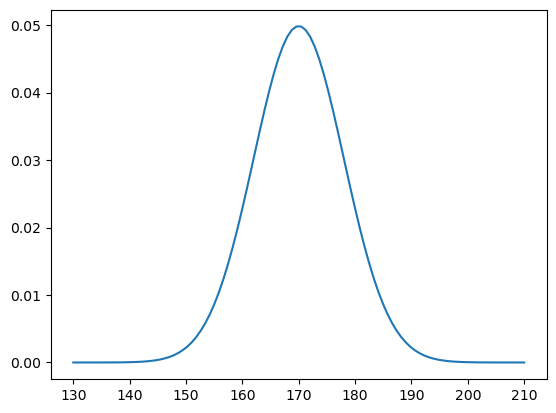

In [3]:
normal_dist = norm(mu, sigma)

x = np.linspace(mu-5*sigma, mu+5*sigma, 100)

fig, ax = plt.subplots(1, 1)
ax.plot(x, normal_dist.pdf(x))

To simulate the CLT we will select an arbitrary sample size $n=10$ and draw 10,000 samples and compute the mean of each sample $m_{i}$, we can then plot the distribution of sample means in a histogram.

(array([  3.,   0.,   5.,   9.,  10.,  14.,  17.,  33.,  54.,  64.,  90.,
        102., 164., 193., 214., 296., 325., 390., 422., 501., 519., 599.,
        594., 590., 595., 550., 549., 551., 437., 411., 346., 312., 235.,
        196., 170., 127.,  92.,  59.,  50.,  29.,  26.,  23.,  15.,  10.,
          3.,   3.,   1.,   0.,   1.,   1.]),
 array([161.13375204, 161.51031919, 161.88688635, 162.26345351,
        162.64002067, 163.01658783, 163.39315498, 163.76972214,
        164.1462893 , 164.52285646, 164.89942361, 165.27599077,
        165.65255793, 166.02912509, 166.40569225, 166.7822594 ,
        167.15882656, 167.53539372, 167.91196088, 168.28852803,
        168.66509519, 169.04166235, 169.41822951, 169.79479667,
        170.17136382, 170.54793098, 170.92449814, 171.3010653 ,
        171.67763245, 172.05419961, 172.43076677, 172.80733393,
        173.18390109, 173.56046824, 173.9370354 , 174.31360256,
        174.69016972, 175.06673687, 175.44330403, 175.81987119,
        176.196438

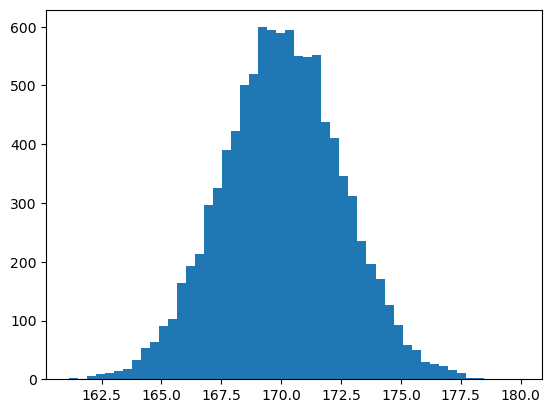

In [4]:
n = 10

np.random.seed(1)
mi_10 = [normal_dist.rvs(n).mean() for i in range(10000)]
plt.hist(mi_10, bins=50)

With $n=30$ the distribution already looks approximately normal, let's increase sample size to $n=100$ to test the convergence towards the bell curve.

(array([  2.,   0.,   0.,   1.,   2.,   3.,  10.,  12.,  16.,  25.,  32.,
         61.,  64.,  84., 118., 138., 190., 248., 311., 344., 384., 451.,
        439., 553., 585., 583., 602., 615., 593., 562., 518., 472., 385.,
        359., 286., 232., 203., 145., 113.,  75.,  50.,  37.,  31.,  26.,
         14.,   8.,  11.,   1.,   3.,   3.]),
 array([166.76563898, 166.88806077, 167.01048256, 167.13290435,
        167.25532614, 167.37774793, 167.50016972, 167.62259151,
        167.7450133 , 167.86743509, 167.98985688, 168.11227867,
        168.23470046, 168.35712225, 168.47954405, 168.60196584,
        168.72438763, 168.84680942, 168.96923121, 169.091653  ,
        169.21407479, 169.33649658, 169.45891837, 169.58134016,
        169.70376195, 169.82618374, 169.94860553, 170.07102732,
        170.19344911, 170.3158709 , 170.43829269, 170.56071449,
        170.68313628, 170.80555807, 170.92797986, 171.05040165,
        171.17282344, 171.29524523, 171.41766702, 171.54008881,
        171.662510

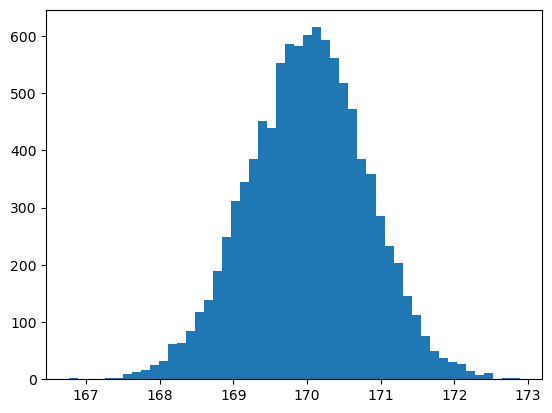

In [5]:
n = 100

np.random.seed(1)
mi_100 = [normal_dist.rvs(n).mean() for i in range(10000)]
plt.hist(mi_100, bins=50)

Notice here that while both sample sizes show a bell curve, as $n$ grows the spread (or variance) of the distribution seems to get thinner, it actually does so following $\frac{\sigma}{\sqrt{n}}$ given the original population $\sigma$, we can demonstrate by experiment.

For the case when $n=10$ we compute the variance of the sampled data means and compare with $\frac{\sigma}{\sqrt{n}}$

In [6]:
np.std(mi_10)

2.5134551686757254

In [7]:
sigma / np.sqrt(10)

2.5298221281347035

What about the case when $n=100$

In [8]:
np.std(mi_100)

0.8072509842769882

In [9]:
sigma / np.sqrt(100)

0.8